# Fuzzy Logic Control System for Smart Home Environment

## Problem Statement

Design a fuzzy logic control system for a smart home environment in the Philippines to maintain a comfortable room temperature. The system should control both a heater and an air conditioner based on the current room temperature and the outside temperature.

## Objective

The objective of this control system is to maintain a comfortable room temperature in a smart home environment in the Philippines by intelligently controlling the operation of both a heater and an air conditioner based on the current room temperature and outside temperature.

## Fuzzy Sets and Rules

1. **Input (Room Temperature):**
   - Cold: 18-25°C
   - Comfortable: 24-30°C
   - Hot: 29-36°C

2. **Input (Outside Temperature):**
   - Very Cold: 15-22°C
   - Cold: 21-28°C
   - Mild: 27-34°C
   - Warm: 33-40°C
   - Hot: 39-46°C

3. **Output (Heater):**
   - Off: 0%
   - Low: 1-33%
   - Medium: 34-66%
   - High: 67-100%

4. **Output (Air Conditioner):**
   - Off: 0%
   - Low: 1-33%
   - Medium: 34-66%
   - High: 67-100%

Then, we can define our fuzzy rules as follows:

   1. If Room Temperature is Cold and Outside Temperature is Very Cold, then Heater is High and Air Conditioner is Off.
   2. If Room Temperature is Cold and Outside Temperature is Cold, then Heater is High and Air Conditioner is Off.
   3. If Room Temperature is Cold and Outside Temperature is Mild, then Heater is High and Air Conditioner is Off.
   4. If Room Temperature is Cold and Outside Temperature is Warm, then Heater is High and Air Conditioner is Off.
   5. If Room Temperature is Cold and Outside Temperature is Hot, then Heater is High and Air Conditioner is Off.
   6. If Room Temperature is Comfortable and Outside Temperature is Very Cold, then Heater is Off and Air Conditioner is Low.
   7. If Room Temperature is Comfortable and Outside Temperature is Cold, then Heater is Off and Air Conditioner is Low.
   8. If Room Temperature is Comfortable and Outside Temperature is Mild, then Heater is Low and Air Conditioner is Medium.
   9. If Room Temperature is Comfortable and Outside Temperature is Warm, then Heater is Off and Air Conditioner is Low.
   10. If Room Temperature is Comfortable and Outside Temperature is Hot, then Heater is Off and Air Conditioner is Low.
   11. If Room Temperature is Hot and Outside Temperature is Very Cold, then Heater is Off and Air Conditioner is High.
   12. If Room Temperature is Hot and Outside Temperature is Cold, then Heater is Off and Air Conditioner is High.
   13. If Room Temperature is Hot and Outside Temperature is Mild, then Heater is Off and Air Conditioner is High.
   14. If Room Temperature is Hot and Outside Temperature is Warm, then Heater is Off and Air Conditioner is High.
   15. If Room Temperature is Hot and Outside Temperature is Hot, then Heater is Off and Air Conditioner is High.

The fuzzy logic controller will take the current room temperature and outside temperature as inputs, apply the fuzzy rules, and then defuzzify the result to get crisp output values for both the heater and air conditioner settings. This way, we can ensure that the room temperature stays comfortable by adjusting both the heater and air conditioner as needed based on both the room temperature and outside temperature.

# Importing the Libraries

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Creation of the Universe Variables

In [2]:
# Create universe variables
temp_room = ctrl.Antecedent(np.arange(0, 41, 1), 'Room Temperature')
temp_outside = ctrl.Antecedent(np.arange(-10, 51, 1), 'Outside Temperature')
heater = ctrl.Consequent(np.arange(0, 101, 1), 'Heater')
ac = ctrl.Consequent(np.arange(0, 101, 1), 'Air Conditioner')

# Room Temperature

C:\Users\Josua\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


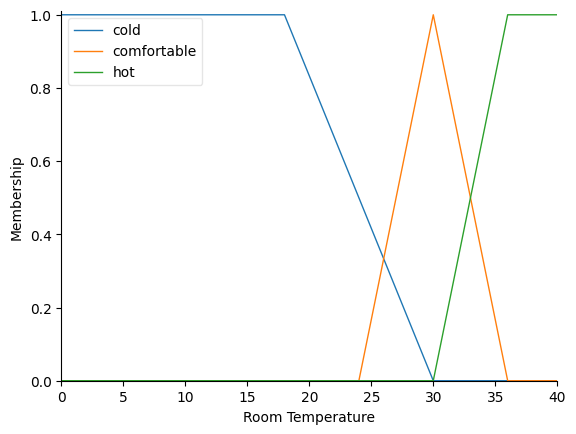

In [3]:
# Define the membership functions for Room Temperature
temp_room['cold'] = fuzz.trapmf(temp_room.universe, [0, 0, 18, 30])
temp_room['comfortable'] = fuzz.trimf(temp_room.universe, [24, 30, 36])
temp_room['hot'] = fuzz.trapmf(temp_room.universe, [30, 36, 40, 40])

temp_room.view()

# Outside Temperature

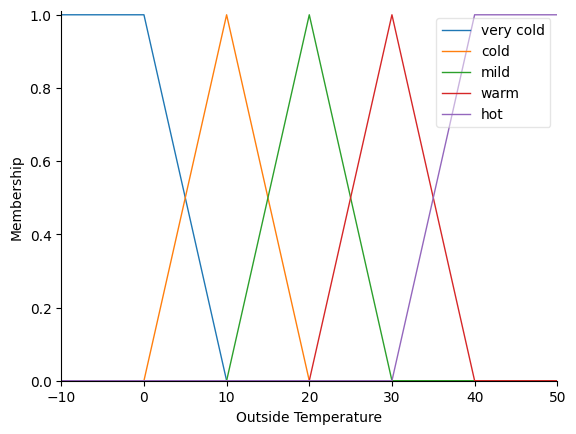

In [4]:
# Define the membership functions for Outside Temperature
temp_outside['very cold'] = fuzz.trapmf(temp_outside.universe, [-10, -10, 0, 10])
temp_outside['cold'] = fuzz.trimf(temp_outside.universe, [0, 10, 20])
temp_outside['mild'] = fuzz.trimf(temp_outside.universe, [10, 20, 30])
temp_outside['warm'] = fuzz.trimf(temp_outside.universe, [20, 30, 40])
temp_outside['hot'] = fuzz.trapmf(temp_outside.universe, [30, 40, 50, 50])

temp_outside.view()

# Heater

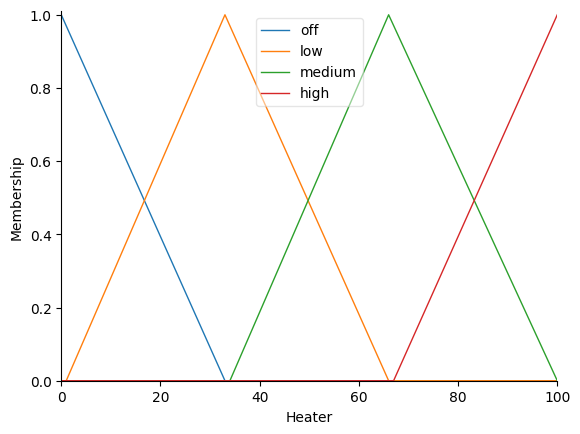

In [5]:
# Define the membership functions for Heater
heater['off'] = fuzz.trimf(heater.universe, [0, 0, 33])
heater['low'] = fuzz.trimf(heater.universe, [1, 33, 66])
heater['medium'] = fuzz.trimf(heater.universe, [34, 66, 100])
heater['high'] = fuzz.trimf(heater.universe, [67, 100, 100])

heater.view()

# Air Conditioner

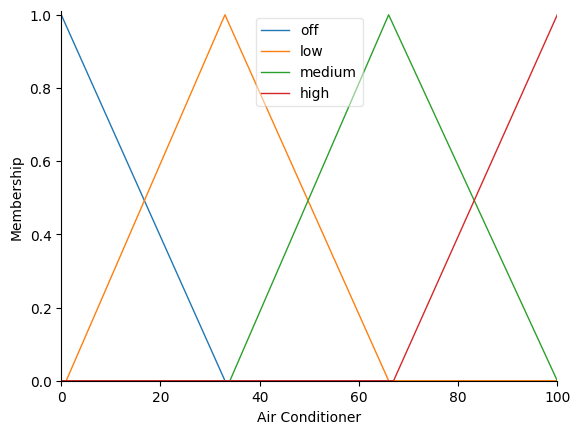

In [6]:
# Define the membership functions for Air Conditioner
ac['off'] = fuzz.trimf(ac.universe, [0, 0, 33])
ac['low'] = fuzz.trimf(ac.universe, [1, 33, 66])
ac['medium'] = fuzz.trimf(ac.universe, [34, 66, 100])
ac['high'] = fuzz.trimf(ac.universe, [67, 100, 100])

ac.view()

# Rules

In [7]:
rule1 = ctrl.Rule(temp_room['cold'] & temp_outside['very cold'], (heater['high'], ac['off']))
rule2 = ctrl.Rule(temp_room['cold'] & temp_outside['cold'], (heater['high'], ac['off']))
rule3 = ctrl.Rule(temp_room['cold'] & temp_outside['mild'], (heater['high'], ac['off']))
rule4 = ctrl.Rule(temp_room['cold'] & temp_outside['warm'], (heater['high'], ac['off']))
rule5 = ctrl.Rule(temp_room['cold'] & temp_outside['hot'], (heater['high'], ac['off']))

rule6 = ctrl.Rule(temp_room['comfortable'] & temp_outside['very cold'], (heater['off'], ac['low']))
rule7 = ctrl.Rule(temp_room['comfortable'] & temp_outside['cold'], (heater['off'], ac['low']))
rule8 = ctrl.Rule(temp_room['comfortable'] & temp_outside['mild'], (heater['low'], ac['medium']))
rule9 = ctrl.Rule(temp_room['comfortable'] & temp_outside['warm'], (heater['off'], ac['low']))
rule10 = ctrl.Rule(temp_room['comfortable'] & temp_outside['hot'], (heater['off'], ac['low']))

rule11 = ctrl.Rule(temp_room['hot'] & temp_outside['very cold'], (heater['off'], ac['high']))
rule12 = ctrl.Rule(temp_room['hot'] & temp_outside['cold'], (heater['off'], ac['high']))
rule13 = ctrl.Rule(temp_room['hot'] & temp_outside['mild'], (heater['off'], ac['high']))
rule14 = ctrl.Rule(temp_room['hot'] & temp_outside['warm'], (heater['off'], ac['high']))
rule15 = ctrl.Rule(temp_room['hot'] & temp_outside['hot'], (heater['off'], ac['high']))

# Control System

In [8]:
control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
controller = ctrl.ControlSystemSimulation(control_system)

# Simulator (Here you can experiment with Room and Outside Temperatures)

In [9]:
controller.input['Room Temperature'] = 10 # this can be changed
controller.input['Outside Temperature'] = 37 # this can be changed
controller.compute()

# Results

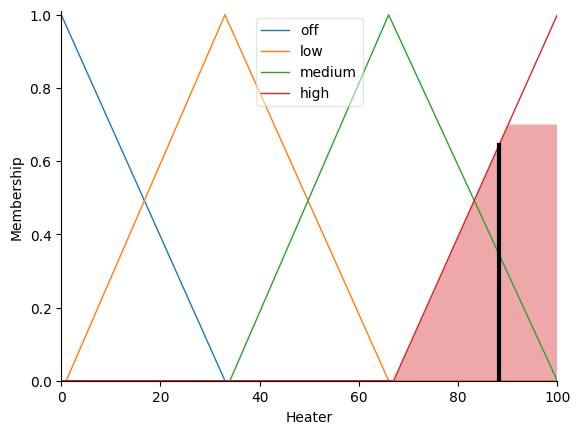

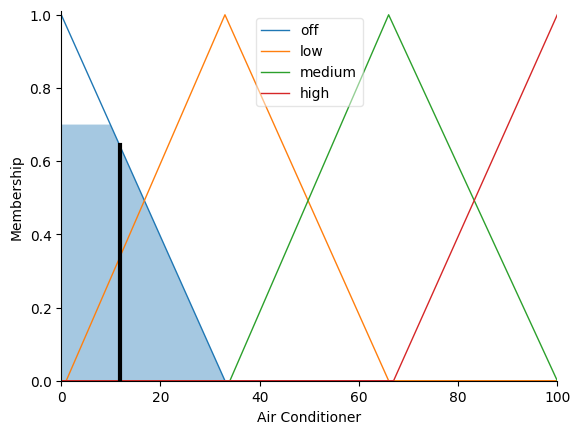

In [10]:
heater.view(sim=controller)
ac.view(sim=controller)

# Decision

In [11]:
# Get the output values
heater_output = controller.output['Heater']
ac_output = controller.output['Air Conditioner']

# Print the output values
print("Heater Output:", heater_output)
print("Air Conditioner Output:", ac_output)

# Make a decision based on the output values
if heater_output > 66:
    heater_decision = "High"
elif heater_output > 33:
    heater_decision = "Medium"
elif heater_output > 0:
    heater_decision = "Low"
else:
    heater_decision = "Off"

if ac_output > 66:
    ac_decision = "High"
elif ac_output > 33:
    ac_decision = "Medium"
elif ac_output > 0:
    ac_decision = "Low"
else:
    ac_decision = "Off"

# Print the decisions
print("\nHeater Setting:", heater_decision)
print("Air Conditioner Setting:", ac_decision)

Heater Output: 88.23846153846156
Air Conditioner Output: 11.761538461538462

Heater Setting: High
Air Conditioner Setting: Low
